In [16]:
import numpy as np
import pywt
from sklearn.decomposition import PCA
from math import log10, sqrt 
from sklearn.cluster import KMeans
from scipy.fftpack import dct, idct
import os
from skimage import io
from skimage import metrics

In [17]:
#define psnr, mse, ssim and compressRatio
def psnr(img, compressed):
    return metrics.peak_signal_noise_ratio(image,compressed)
def mse(img, compressed):
    return metrics.mean_squared_error(image,compressed)
def ssim(img, compressed):
    return metrics.structural_similarity(image,compressed,multichannel=True)
def compressRatio(img, compressed):
    return img/compressed

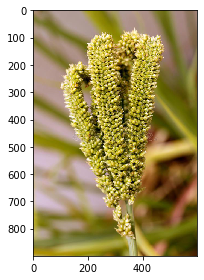

In [31]:
#read the image and take its RGB values individually 
image = io.imread('crop_dwt_02.jpg')
io.imshow(image)
io.show()
blue,green,red =image[:,:,0],image[:,:,1],image[:,:,2]

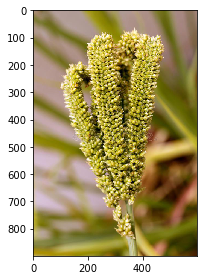

In [32]:
#apply dwt2 on RGB array
C1 = pywt.dwt2(blue, 'db1', mode='periodization')
C2 = pywt.dwt2(green, 'db1', mode='periodization')
C3 = pywt.dwt2(red, 'db1', mode='periodization')

#apply inversedwt2 to get RGB array
O1 = pywt.idwt2(C1, 'db1', mode='periodization')
O2 = pywt.idwt2(C2, 'db1', mode='periodization')
O3 = pywt.idwt2(C3, 'db1', mode='periodization')

#combine the RGB value to get back the image
dwt_compressed = (np.dstack((O1, O2, O3))).astype(np.uint8)

#show the image after compression
io.imshow(dwt_compressed)
io.show()
#Save the image into memory
io.imsave('crop_dwt_03.jpg', dwt_compressed)


In [33]:
print('before compression:',os.path.getsize('crop.jpg'),'Bytes')
print('after compression:',os.path.getsize('crop_dwt_03.jpg'),'Bytes')
print('*' * 50)


before compression: 104782 Bytes
after compression: 75864 Bytes
**************************************************


In [34]:
#read RGB values of original image 
img = io.imread('crop.jpg')

In [35]:

print ("mse, psnr, ssim and cr value")
print("mse is :",mse(img, dwt_compressed))
print("psnr is :",psnr(img, dwt_compressed))
print("ssim is :",ssim(img, dwt_compressed))
print("compression ratio is :",compressRatio(os.path.getsize('crop.jpg'),os.path.getsize('crop_dwt_03.jpg')))
print(dwt_compressed.shape)
print(img.shape)

mse, psnr, ssim and cr value
mse is : 0.004201851851851852
psnr is : 71.89639624805943
ssim is : 0.9999865418215453
compression ratio is : 1.3811821153643362
(900, 600, 3)
(900, 600, 3)
